#**Detector de anomalía**

##**Paso 1: Configuración del Entorno**

Primero, se necesitan las bibliotecas necesarias. Streamlit y otras ya no son necesarias para este proyecto. La primera celda del cuaderno debe instalar y cargar las bibliotecas que se usarán.

In [ ]:
# 1. Instalación de las bibliotecas
# scikit-learn ya viene preinstalado en Google Colab
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

# Carga de las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Para crear datos sintéticos para el ejemplo
from sklearn.datasets import make_blobs

print("Bibliotecas cargadas con éxito.")

Bibliotecas cargadas con éxito.


##**Paso 2: Generación de Datos de Ejemplo**

Para que el proyecto sea reproducible, se crea un conjunto de datos simple que contenga algunas anomalías. Esto permite ver cómo el modelo funciona en la práctica.

In [ ]:
# 2. Generación de datos de ejemplo
# Se usa make_blobs para crear un conjunto de datos
# con un grupo de puntos y luego se añaden algunas anomalías
# manualmente.

# Generar 300 puntos de datos "normales"
X, _ = make_blobs(n_samples=300, centers=[[0, 0]], cluster_std=0.5, random_state=42)

# Generar 20 puntos de datos de "anomalía"
X_anomalies, _ = make_blobs(n_samples=20, centers=[[2, 2]], cluster_std=0.5, random_state=42)

# Combinar los datos normales y las anomalías
X_total = np.concatenate([X, X_anomalies], axis=0)

# Convertir a un DataFrame de pandas para un mejor manejo
df = pd.DataFrame(X_total, columns=['feature1', 'feature2'])

print("Datos generados con éxito. Primeras 5 filas:")
print(df.head())
print("\nÚltimas 5 filas (posibles anomalías):")
print(df.tail())

Datos generados con éxito. Primeras 5 filas:
   feature1  feature2
0 -0.595652  0.328277
1 -0.272191  0.055461
2  0.060148  0.257219
3 -0.490754  0.231052
4  0.029104 -0.571485

Últimas 5 filas (posibles anomalías):
     feature1  feature2
315  1.424503  2.187849
316  1.545988  1.293848
317  2.323844  2.761515
318  2.033764  1.287626
319  2.411272  1.389578


##**Paso 3: Visualización de los Datos**

Antes de usar el modelo, es útil visualizar los datos para ver las anomalías. Esto ayuda a entender cómo el algoritmo las detecta.

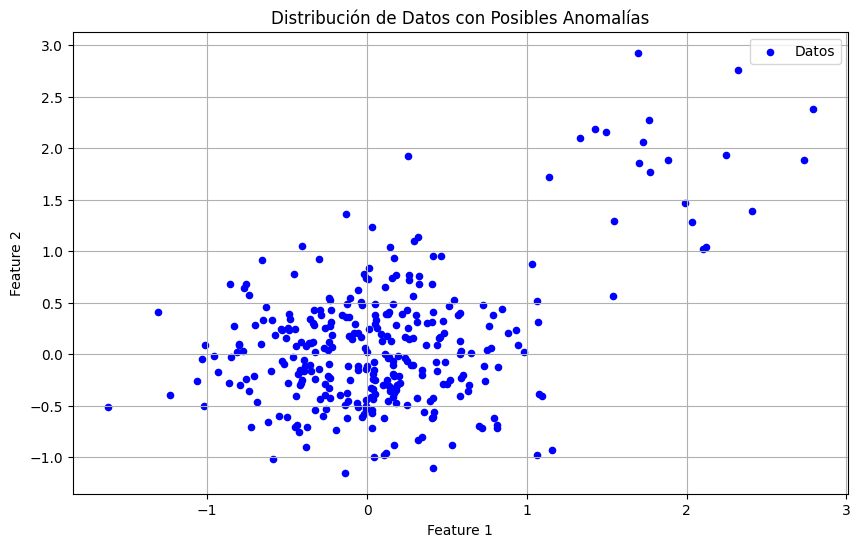

Gráfico de dispersión generado. Los puntos atípicos (anomalías) se ven a simple vista.


In [ ]:
# 3. Visualización de los datos generados
# Se usa un gráfico de dispersión para ver la distribución de los puntos.

plt.figure(figsize=(10, 6))
plt.scatter(df['feature1'], df['feature2'], c='blue', label='Datos', s=20)
plt.title('Distribución de Datos con Posibles Anomalías')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

print("Gráfico de dispersión generado. Los puntos atípicos (anomalías) se ven a simple vista.")

##**Paso 4: Aplicación del Algoritmo Isolation Forest**

Al tener los datos, se utiliza Isolation Forest para identificar las anomalías. Este algoritmo funciona aislando los "puntos extraños" en el conjunto de datos.

In [ ]:
# 4. Aplicación del modelo Isolation Forest

# Crear una instancia del modelo.
# 'contamination' es el porcentaje de anomalías esperado.
# En este caso, de 320 puntos, 20 son anomalías, que es el 6.25%
model = IsolationForest(
    contamination=0.0625,  # Un valor entre 0 y 0.5
    random_state=42
)

# Entrenar el modelo con los datos
model.fit(df[['feature1', 'feature2']])

# Predecir las anomalías
# El resultado es 1 para los puntos "normales" y -1 para las anomalías
df['anomalies'] = model.predict(df[['feature1', 'feature2']])

print("Predicciones de anomalías realizadas. Primeras 5 filas:")
print(df.head())
print("\nÚltimas 5 filas (posibles anomalías):")
print(df.tail())

Predicciones de anomalías realizadas. Primeras 5 filas:
   feature1  feature2  anomalies
0 -0.595652  0.328277          1
1 -0.272191  0.055461          1
2  0.060148  0.257219          1
3 -0.490754  0.231052          1
4  0.029104 -0.571485          1

Últimas 5 filas (posibles anomalías):
     feature1  feature2  anomalies
315  1.424503  2.187849         -1
316  1.545988  1.293848          1
317  2.323844  2.761515         -1
318  2.033764  1.287626          1
319  2.411272  1.389578         -1


##**Paso 5: Visualización de los Resultados**

Se pueden graficar los resultados para ver cómo el modelo ha clasificado cada punto, permitiendo ver si el algoritmo detectó las anomalías que agregamos manualmente.

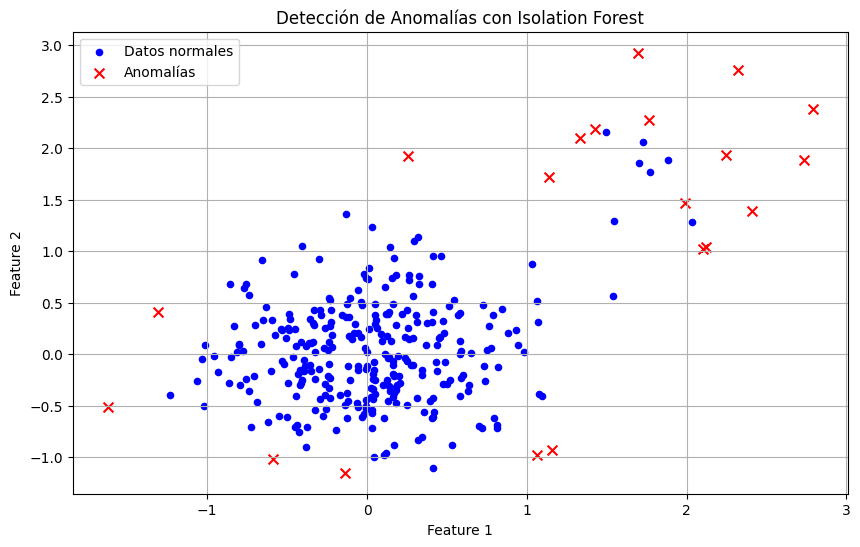

Gráfico de resultados generado. Las anomalías detectadas están marcadas en rojo.


In [ ]:
# 5. Visualización de los resultados del modelo

# Crear dos DataFrames separados, uno para las anomalías y otro para los datos normales
df_anomalies = df[df['anomalies'] == -1]
df_normal = df[df['anomalies'] == 1]

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Graficar los puntos normales en azul
plt.scatter(
    df_normal['feature1'],
    df_normal['feature2'],
    c='blue',
    label='Datos normales',
    s=20
)

# Graficar las anomalías en rojo
plt.scatter(
    df_anomalies['feature1'],
    df_anomalies['feature2'],
    c='red',
    label='Anomalías',
    s=50,
    marker='x'  # Usar una 'x' para resaltar las anomalías
)

plt.title('Detección de Anomalías con Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

print("Gráfico de resultados generado. Las anomalías detectadas están marcadas en rojo.")

##**Paso 6: Evaluación del Modelo y Visualización en 3D**

Se puede evaluar el modelo de forma más rigurosa y, si los datos tienen más dimensiones, visualizar los resultados en 3D para una mejor comprensión.

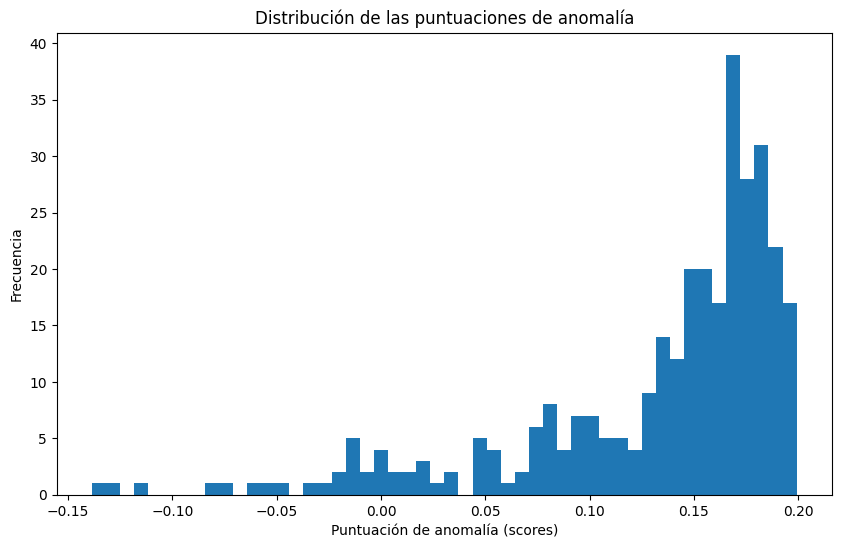

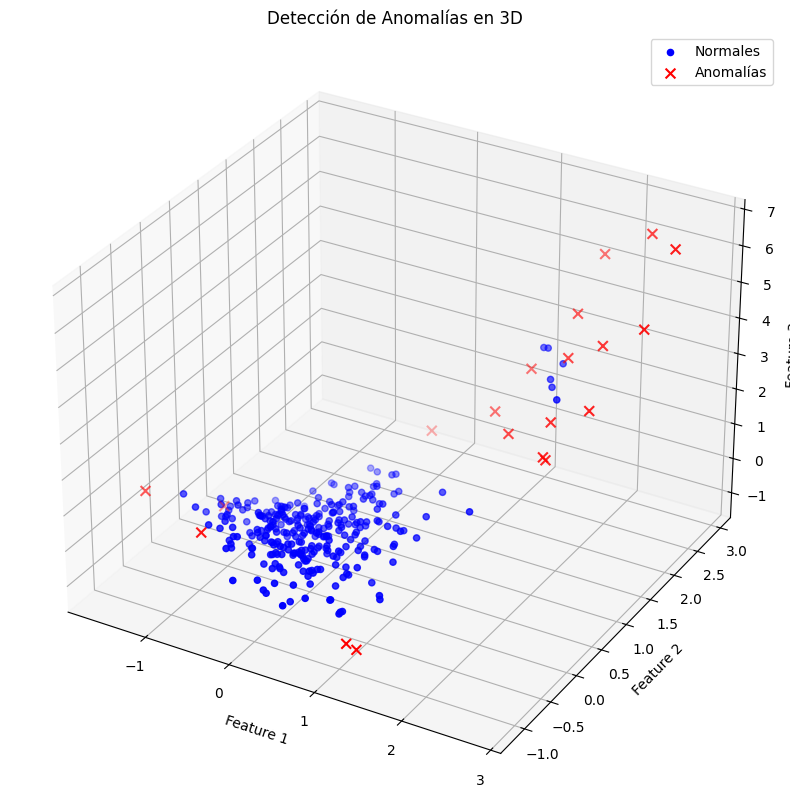

In [14]:
# 6. Evaluación del modelo y visualización en 3D
# Usar el score_samples() para obtener la puntuación de anomalía de cada punto.
# Las puntuaciones más bajas indican una mayor probabilidad de ser una anomalía.

# Obtener las puntuaciones de anomalía
scores_pred = model.decision_function(df[['feature1', 'feature2']])

# Graficar un histograma de las puntuaciones para entender la distribución
plt.figure(figsize=(10, 6))
plt.hist(scores_pred, bins=50)
plt.title("Distribución de las puntuaciones de anomalía")
plt.xlabel("Puntuación de anomalía (scores)")
plt.ylabel("Frecuencia")
plt.show()

# Se puede usar un umbral (threshold) para clasificar anomalías
# El umbral por defecto de Isolation Forest es 0.

# Visualización en 3D (si tienes 3 dimensiones o más)
# Se simula un tercer "feature" para fines de demostración
df['feature3'] = df['feature1'] * df['feature2'] + np.random.randn(len(df)) * 0.2

# Volver a entrenar el modelo con los 3 features
model_3d = IsolationForest(contamination=0.0625, random_state=42)
model_3d.fit(df[['feature1', 'feature2', 'feature3']])
df['anomalies_3d'] = model_3d.predict(df[['feature1', 'feature2', 'feature3']])

# Visualización en 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Separar los datos normales y las anomalías para la visualización 3D
df_anomalies_3d = df[df['anomalies_3d'] == -1]
df_normal_3d = df[df['anomalies_3d'] == 1]

# Graficar los puntos normales en azul y las anomalías en rojo
ax.scatter(df_normal_3d['feature1'], df_normal_3d['feature2'], df_normal_3d['feature3'], c='blue', s=20, label='Normales')
ax.scatter(df_anomalies_3d['feature1'], df_anomalies_3d['feature2'], df_anomalies_3d['feature3'], c='red', s=50, marker='x', label='Anomalías')

ax.set_title('Detección de Anomalías en 3D')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()

##**Paso 7: Preparación para GitHub**

Una vez que tengas el código finalizado en el cuaderno de Colab, es crucial prepararlo para tu repositorio de GitHub.

In [15]:
# 8. Escribir el código en un archivo .py para GitHub
# %%writefile es un comando de Colab que guarda el contenido de la celda en un archivo.
# NOTA: Se debe eliminar esta línea (%%writefile my_anomaly_detector.py)
# antes de subir el archivo a GitHub.

%%writefile my_anomaly_detector.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Generación de datos de ejemplo (se recomienda usar datos reales para un proyecto serio)
X, _ = make_blobs(n_samples=300, centers=[[0, 0]], cluster_std=0.5, random_state=42)
X_anomalies, _ = make_blobs(n_samples=20, centers=[[2, 2]], cluster_std=0.5, random_state=42)
X_total = np.concatenate([X, X_anomalies], axis=0)
df = pd.DataFrame(X_total, columns=['feature1', 'feature2'])

# Aplicación del modelo Isolation Forest
model = IsolationForest(contamination=0.0625, random_state=42)
model.fit(df[['feature1', 'feature2']])
df['anomalies'] = model.predict(df[['feature1', 'feature2']])

# Visualización de los resultados
df_anomalies = df[df['anomalies'] == -1]
df_normal = df[df['anomalies'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(df_normal['feature1'], df_normal['feature2'], c='blue', label='Datos normales', s=20)
plt.scatter(df_anomalies['feature1'], df_anomalies['feature2'], c='red', label='Anomalías', s=50, marker='x')
plt.title('Detección de Anomalías con Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

print("¡Anomalías detectadas con éxito!")

Writing my_anomaly_detector.py
